# Imports


In [ ]:
!pip install scikit_posthocs

In [ ]:
import os
import numpy as np
import glob
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
# import colorcet as cc
import os
import plotly.io as pio
import scikit_posthocs as sp

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import friedmanchisquare

In [ ]:
# #colab
# from google.colab import auth
# auth.authenticate_user()
# project_id = "idc-sandbox-003"
# os.environ["GCP_PROJECT_ID"] = project_id
# from google.cloud import bigquery
# bq_client = bigquery.Client(os.environ["GCP_PROJECT_ID"])

In [ ]:
# selection_query = f"""
# SELECT *
# FROM `idc-sandbox-003.prostate_seg_terra_mhub_v3.final_table_looker_studio`
#  """
# selection_result = bq_client.query(selection_query)
# data_df = selection_result.result().to_dataframe()
!wget https://raw.githubusercontent.com/ImagingDataCommons/idc-prostate-mri-analysis/refs/heads/main/analysis_results/analysis_results.csv -O analysis_results.csv
data_df = pd.read_csv("analysis_results.csv")

In [ ]:
# pd.set_option('display.max_colwidth', -1)

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   segmentationInstanceUID               4907 non-null   object 
 1   sourceSegmentedSeriesUID              4907 non-null   object 
 2   expert_QuantityCodeMeaning            4909 non-null   object 
 3   expert_QuantityCodeValue              4909 non-null   object 
 4   expert_Value                          4909 non-null   object 
 5   expert_UnitsCodeValue                 4909 non-null   object 
 6   expert_UnitsCodeMeaning               4909 non-null   object 
 7   expert_findingSiteCodeValue           4909 non-null   object 
 8   expert_findingSiteCodeMeaning         4909 non-null   object 
 9   ai_QuantityCodeMeaning                4907 non-null   object 
 10  ai_QuantityCodeValue                  4907 non-null   object 
 11  ai_QuantityCoding

In [ ]:
data_df.head()

,segmentationInstanceUID,sourceSegmentedSeriesUID,expert_QuantityCodeMeaning,expert_QuantityCodeValue,expert_Value,expert_UnitsCodeValue,expert_UnitsCodeMeaning,expert_findingSiteCodeValue,expert_findingSiteCodeMeaning,ai_QuantityCodeMeaning,...,image_SeriesDate,image_StudyDate,image_StudyDescription,image_StudyDescription_1,image_Manufacturer,image_ManufacturerModelName,image_PatientID,SegmentAlgorithmName,ohif_url,algorithmNameCollection
0,1.2.276.0.7230010.3.1.4.313263360.645.17286796...,1.3.6.1.4.1.14519.5.2.1.7310.5101.460054567474...,Volume of Mesh,RNU0,58480.969000000,mm3,cubic millimeter,41216001,Prostate,Volume of Mesh,...,2011-03-03,2011-03-03,MR prostaat kanker detectie WDS_mc MCAPRODETW,MR prostaat kanker detectie WDS_mc MCAPRODETW,SIEMENS,Skyra,ProstateX-0293,nnunet_prostate_zonal_task05,https://fir-idc-prostate-ohif.web.app/viewer/1...,nnunet_prostate_zonal_task05-prostatex
1,1.2.276.0.7230010.3.1.4.313263360.162.17286794...,1.3.6.1.4.1.14519.5.2.1.7310.5101.460054567474...,Volume of Mesh,RNU0,58480.969000000,mm3,cubic millimeter,41216001,Prostate,Volume of Mesh,...,2011-03-03,2011-03-03,MR prostaat kanker detectie WDS_mc MCAPRODETW,MR prostaat kanker detectie WDS_mc MCAPRODETW,SIEMENS,Skyra,ProstateX-0293,monai_prostate158,https://fir-idc-prostate-ohif.web.app/viewer/1...,monai_prostate158-prostatex
2,1.2.276.0.7230010.3.1.4.313263360.151.17286799...,1.3.6.1.4.1.14519.5.2.1.7310.5101.460054567474...,Volume of Mesh,RNU0,58480.969000000,mm3,cubic millimeter,41216001,Prostate,Volume of Mesh,...,2011-03-03,2011-03-03,MR prostaat kanker detectie WDS_mc MCAPRODETW,MR prostaat kanker detectie WDS_mc MCAPRODETW,SIEMENS,Skyra,ProstateX-0293,bamf_nnunet_mr_prostate,https://fir-idc-prostate-ohif.web.app/viewer/1...,bamf_nnunet_mr_prostate-prostatex
3,1.2.276.0.7230010.3.1.4.313263360.150.17286825...,1.3.6.1.4.1.14519.5.2.1.7310.5101.460054567474...,Volume of Mesh,RNU0,58480.969000000,mm3,cubic millimeter,41216001,Prostate,Volume of Mesh,...,2011-03-03,2011-03-03,MR prostaat kanker detectie WDS_mc MCAPRODETW,MR prostaat kanker detectie WDS_mc MCAPRODETW,SIEMENS,Skyra,ProstateX-0293,nnunet_prostate_task24,https://fir-idc-prostate-ohif.web.app/viewer/1...,nnunet_prostate_task24-prostatex
4,1.2.276.0.7230010.3.1.4.313263360.210.17286796...,1.3.6.1.4.1.14519.5.2.1.7311.5101.196511587017...,Volume of Mesh,RNU0,131472.031000000,mm3,cubic millimeter,41216001,Prostate,Volume of Mesh,...,2012-03-27,2012-03-27,MR prostaat kanker detectie WDS_mc MCAPRODETW,MR prostaat kanker detectie WDS_mc MCAPRODETW,SIEMENS,Skyra,ProstateX-0161,bamf_nnunet_mr_prostate,https://fir-idc-prostate-ohif.web.app/viewer/1...,bamf_nnunet_mr_prostate-prostatex


# Analysis


## Seaborn parameters


In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
# Setting the font size by 2.5
sns.set(font_scale=1.5)

## Mean and STDs of quantitative region and distance based metrics


In [ ]:
data_df.algorithmNameCollection.unique()

array(['nnunet_prostate_zonal_task05-prostatex',
       'monai_prostate158-prostatex', 'bamf_nnunet_mr_prostate-prostatex',
       'nnunet_prostate_task24-prostatex',
       'bamf_nnunet_mr_prostate-prostate_mri_us_biopsy',
       'nnunet_prostate_task24-prostate_mri_us_biopsy',
       'nnunet_prostate_zonal_task05-prostate_mri_us_biopsy',
       'monai_prostate158-prostate_mri_us_biopsy',
       'bamf_nnunet_mr_prostate-qin_prostate_repeatability',
       'nnunet_prostate_zonal_task05-qin_prostate_repeatability',
       'monai_prostate158-qin_prostate_repeatability',
       'nnunet_prostate_task24-qin_prostate_repeatability'], dtype=object)

### ProstateX


#### Whole prostate


In [ ]:
prostate_prostatex_df = data_df[(data_df.collection_id == 'prostatex') & (data_df.SegmentedPropertyTypeCodeMeaning.isin(['Prostate', 'Prostatic structure']))]
len(prostate_prostatex_df)

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 3553
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   segmentationInstanceUID               392 non-null    object 
 1   sourceSegmentedSeriesUID              392 non-null    object 
 2   expert_QuantityCodeMeaning            392 non-null    object 
 3   expert_QuantityCodeValue              392 non-null    object 
 4   expert_Value                          392 non-null    object 
 5   expert_UnitsCodeValue                 392 non-null    object 
 6   expert_UnitsCodeMeaning               392 non-null    object 
 7   expert_findingSiteCodeValue           392 non-null    object 
 8   expert_findingSiteCodeMeaning         392 non-null    object 
 9   ai_QuantityCodeMeaning                392 non-null    object 
 10  ai_QuantityCodeValue                  392 non-null    object 
 11  ai_QuantityCodingScheme

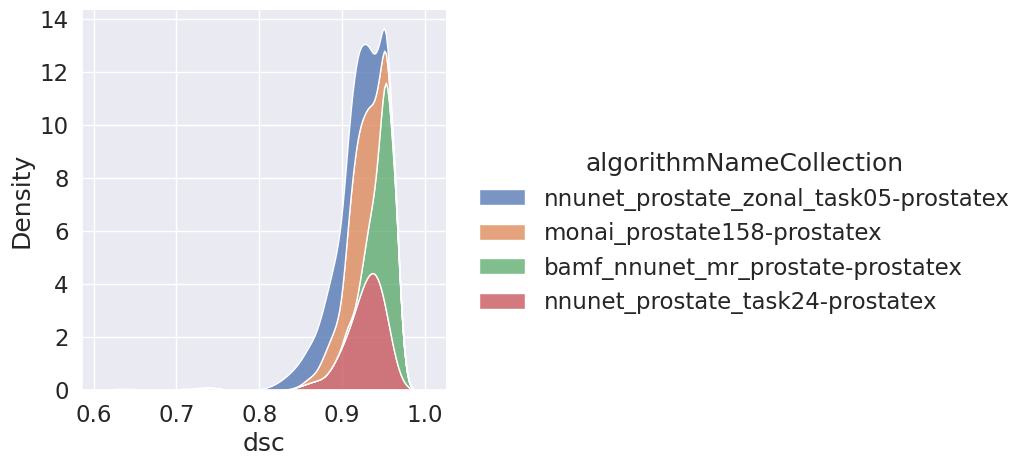

In [ ]:
sns.displot(prostate_prostatex_df,  x='dsc', hue="algorithmNameCollection", kind="kde", multiple="stack")

In [ ]:
nnnunet_task024_prostate_df = prostate_prostatex_df[prostate_prostatex_df.algorithmNameCollection == 'nnunet_prostate_task24-prostatex']
nnnunet_task05_prostate_df = prostate_prostatex_df[prostate_prostatex_df.algorithmNameCollection == 'nnunet_prostate_zonal_task05-prostatex']
monai_prostate158_prostate_df = prostate_prostatex_df[prostate_prostatex_df.algorithmNameCollection == 'monai_prostate158-prostatex']
bamf_nnunet_mr_prostate_df = prostate_prostatex_df[prostate_prostatex_df.algorithmNameCollection == 'bamf_nnunet_mr_prostate-prostatex']

In [ ]:
assert sorted(nnnunet_task024_prostate_df.refSerieUID.unique()) == sorted(nnnunet_task05_prostate_df.refSerieUID.unique()) == sorted(monai_prostate158_prostate_df.refSerieUID.unique()) == sorted(bamf_nnunet_mr_prostate_df.refSerieUID.unique())

In [ ]:
len(nnnunet_task024_prostate_df)

98

In [ ]:
nnnunet_task024_prostate_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,98.000000,98.000000,98.000000
mean,0.925558,0.510102,6.895405
std,0.028936,0.424957,3.621366
min,0.740932,0.000000,3.000000
25%,0.914818,0.000000,4.690416
50%,0.932957,0.530000,6.000000
75%,0.942233,0.835000,6.991048
max,0.959794,1.350000,26.196373


In [ ]:
nnnunet_task05_prostate_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,98.000000,98.0,98.000000
mean,0.895606,0.0,12.738488
std,0.042162,0.0,14.181561
min,0.636936,0.0,4.242640
25%,0.881353,0.0,6.041523
50%,0.902995,0.0,7.424387
75%,0.922230,0.0,9.024271
max,0.948072,0.0,59.625916


In [ ]:
monai_prostate158_prostate_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,98.000000,98.0,98.000000
mean,0.919073,0.0,6.940947
std,0.018347,0.0,2.465612
min,0.860250,0.0,3.535534
25%,0.910644,0.0,5.830952
50%,0.920005,0.0,6.103278
75%,0.930457,0.0,8.111298
max,0.956414,0.0,19.685020


In [ ]:
bamf_nnunet_mr_prostate_df[['dsc', 'asd', 'hsdff']].describe()


,dsc,asd,hsdff
count,98.000000,98.000000,98.000000
mean,0.952376,0.261939,4.679789
std,0.011993,0.232976,2.678833
min,0.905998,0.000000,3.000000
25%,0.946287,0.000000,3.162278
50%,0.953210,0.280000,3.552776
75%,0.960622,0.397500,5.074265
max,0.973736,1.010000,18.466185


Normality tests


In [ ]:
for df_val in [nnnunet_task024_prostate_df,
               nnnunet_task05_prostate_df,
               monai_prostate158_prostate_df,
               bamf_nnunet_mr_prostate_df]:
    # normality test
    stat, p = shapiro(df_val.dsc.values)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print("\n")

Statistics=0.764, p=0.000
Sample does not look Gaussian (reject H0)


Statistics=0.726, p=0.000
Sample does not look Gaussian (reject H0)


Statistics=0.969, p=0.022
Sample does not look Gaussian (reject H0)


Statistics=0.952, p=0.001
Sample does not look Gaussian (reject H0)




In [ ]:
# sns.histplot(data=monai_prostate158_prostate_df, x="dsc")
# plt.show()

In [ ]:
# Checking normality
_, p_normality = stats.shapiro(nnnunet_task024_prostate_df['dsc'])
print(f'p-value for normality: {p_normality}')

p-value for normality: 3.033528584386632e-11


Mean and STD deviations for prostatex whole prostate results


In [ ]:
print(f"nnunet task024 model DSC mean and std for whole prostate: {round(np.mean(nnnunet_task024_prostate_df.dsc.values),2)}/{round(np.std(nnnunet_task024_prostate_df.dsc.values),2)}")
print(f"nnunet task05 model DSC mean and std for whole prostate: {round(np.mean(nnnunet_task05_prostate_df.dsc.values),2)}/{round(np.std(nnnunet_task05_prostate_df.dsc.values),2)}")
print(f"nnunet monai prostate158 DSC model mean and std for whole prostate: {round(np.mean(monai_prostate158_prostate_df.dsc.values),2)}/{round(np.std(monai_prostate158_prostate_df.dsc.values),2)}")
print(f"nnunet monai prostate158 DSC model mean and std for whole prostate: {round(np.mean(bamf_nnunet_mr_prostate_df.dsc.values),2)}/{round(np.std(bamf_nnunet_mr_prostate_df.dsc.values),2)}")

nnunet task024 model DSC mean and std for whole prostate: 0.93/0.03
nnunet task05 model DSC mean and std for whole prostate: 0.9/0.04
nnunet monai prostate158 DSC model mean and std for whole prostate: 0.92/0.02
nnunet monai prostate158 DSC model mean and std for whole prostate: 0.95/0.01


In [ ]:
res = friedmanchisquare(nnnunet_task024_prostate_df.sort_values(by=["refSerieUID"]).dsc.values,
                        nnnunet_task05_prostate_df.sort_values(by=["refSerieUID"]).dsc.values,
                        monai_prostate158_prostate_df.sort_values(by=["refSerieUID"]).dsc.values,
                        bamf_nnunet_mr_prostate_df.sort_values(by=["refSerieUID"]).dsc.values)
print(res.statistic)
print(res.pvalue)

227.84081632653056
4.0517712834878306e-49


In [ ]:
sp.posthoc_conover(prostate_prostatex_df, val_col='dsc', group_col='algorithmNameCollection', p_adjust = 'bonf')

,bamf_nnunet_mr_prostate-prostatex,monai_prostate158-prostatex,nnunet_prostate_task24-prostatex,nnunet_prostate_zonal_task05-prostatex
bamf_nnunet_mr_prostate-prostatex,1.000000e+00,2.024997e-37,1.138467e-22,4.875891e-60
monai_prostate158-prostatex,2.024997e-37,1.000000e+00,1.027319e-03,9.261635e-07
nnunet_prostate_task24-prostatex,1.138467e-22,1.027319e-03,1.000000e+00,2.117918e-17
nnunet_prostate_zonal_task05-prostatex,4.875891e-60,9.261635e-07,2.117918e-17,1.000000e+00


Conover pairwise post-hoc test tells us that there are significant differences across all models, especially task05 and the rest of the models.


Using a significance level of 5%, we would reject the null hypothesis in favor of the alternative hypothesis: “Dice scores are different across models for ProstateX collections”.


Friedman test tells us that there are significant differences(x2(3)=54, p=0.12e-13) in dice scores between all 3 models for ProstateX collection.


#### Paired tests on mean DSC, same collection == Wilcoxon signed rank test with Bon.. correction


The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.

In particular, it tests whether the distribution of the differences x - y is symmetric about zero.

It is a non-parametric version of the paired T-test.


The p-value measures the probability of getting a more extreme value than the one you got from the experiment.

If the p-value is greater than alpha, you accept the null hypothesis.

If it is less than alpha, you reject the null hypothesis.


Other infos on statistical testing :


In [ ]:
from scipy.stats import wilcoxon

**Bonferroni correction : 4 paired Wilcoxon tests so alpha = 0.05/4 = 0.0125**


Pair 1 : task024 dsc differences vs task05


In [ ]:
diff = nnnunet_task024_prostate_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_df.sort_values(by=['refSerieUID']).dsc.values

In [ ]:
res = wilcoxon(diff)
res.statistic, res.pvalue

(85.0, 1.0974039719164549e-16)

In [ ]:
res = wilcoxon(diff, alternative='less')
res.statistic, res.pvalue

(4766.0, 1.0)

This shows that the null hypothesis that the median of dsc differences is negative can be rejected at a confidence level of 5% in favor of the alternative that the median is greater than zero.


Pair 2 : task024 dsc differences vs monai


In [ ]:
diff = nnnunet_task024_prostate_df.sort_values(by=['refSerieUID']).dsc.values - monai_prostate158_prostate_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(1317.0, 8.56355971010145e-05)

In [ ]:
res = wilcoxon(diff, alternative='less')
res.statistic, res.pvalue

(3534.0, 0.9999571822014495)

Pair 3 : task05 dsc differences vs monai


In [ ]:
diff = monai_prostate158_prostate_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(446.0, 2.3075515740758437e-12)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(4405.0, 1.1537757870379218e-12)

Pair 4 : bamf_nnunet_mr_prostate vs nnunet_task024

In [ ]:
diff = bamf_nnunet_mr_prostate_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task024_prostate_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(2.0, 8.860504485789389e-18)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(4849.0, 4.4302522428946944e-18)

Pair 5 : bamf_nnunet_mr_prostate vs nnunet_task05

In [ ]:
diff = bamf_nnunet_mr_prostate_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(0.0, 8.33039747348591e-18)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(4851.0, 4.165198736742955e-18)

Pair 6 : bamf_nnunet_mr_prostate vs monai prostate158

In [ ]:
diff = bamf_nnunet_mr_prostate_df.sort_values(by=['refSerieUID']).dsc.values - monai_prostate158_prostate_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(3.0, 9.137907036390102e-18)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(4848.0, 4.568953518195051e-18)

#### Peripheral Zone


In [ ]:
data_df.SegmentedPropertyTypeCodeMeaning.unique()

array(['Prostate', 'Prostatic structure',
       'Structure of peripheral glandular zone of prostate (body structure)',
       'Structure of transition zone of prostate (body structure)'],
      dtype=object)

In [ ]:
pz_prostatex_df = data_df[(data_df.collection_id == 'prostatex') & (data_df.SegmentedPropertyTypeCodeMeaning == 'Structure of peripheral glandular zone of prostate (body structure)')]
len(pz_prostatex_df)

195

In [ ]:
pz_prostatex_df.algorithmNameCollection.unique()

array(['nnunet_prostate_zonal_task05-prostatex',
       'monai_prostate158-prostatex'], dtype=object)

In [ ]:
nnunet_pz_prostatex_df =  pz_prostatex_df[pz_prostatex_df.algorithmNameCollection == 'nnunet_prostate_zonal_task05-prostatex']
monai_pz_prostatex_df = pz_prostatex_df[pz_prostatex_df.algorithmNameCollection == 'monai_prostate158-prostatex']

In [ ]:
len(nnunet_pz_prostatex_df)

97

In [ ]:
len(monai_pz_prostatex_df)

98

In [ ]:
# nnunet_pz_prostatex_df = nnunet_pz_prostatex_df.drop_duplicates(subset='refSerieUID', keep="last")

In [ ]:
print(f"nnunet task05 model DSC mean and std for pz: {round(np.mean(nnunet_pz_prostatex_df.dsc.values),2)}/{round(np.std(nnunet_pz_prostatex_df.dsc.values),2)}")
print(f"monai model DSC mean and std for pz: {round(np.mean(monai_pz_prostatex_df.dsc.values),2)}/{round(np.std(monai_pz_prostatex_df.dsc.values),2)}")

nnunet task05 model DSC mean and std for pz: 0.67/0.14
monai model DSC mean and std for pz: 0.74/0.08


In [ ]:
diff = monai_pz_prostatex_df[monai_pz_prostatex_df.refSerieUID.isin(nnunet_pz_prostatex_df.refSerieUID.unique())].sort_values(by=['refSerieUID']).dsc.values - nnunet_pz_prostatex_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(737.0, 3.65036478520205e-09)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(4016.0, 1.825182392601025e-09)

In [ ]:
nnunet_pz_prostatex_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,97.000000,97.000000,97.000000
mean,0.673065,2.006186,16.862658
std,0.138787,2.178992,7.145075
min,0.059166,0.620000,7.632169
25%,0.635312,1.010000,11.264053
50%,0.712014,1.360000,15.378556
75%,0.755970,2.280000,20.413403
max,0.844456,15.620000,43.934612


In [ ]:
monai_pz_prostatex_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,98.000000,98.0,98.000000
mean,0.737500,0.0,12.964193
std,0.081039,0.0,5.238738
min,0.460548,0.0,5.024938
25%,0.697544,0.0,9.243224
50%,0.756841,0.0,11.788753
75%,0.788580,0.0,15.554309
max,0.884381,0.0,30.588818


#### Transition zone


In [ ]:
tz_prostatex_df = data_df[(data_df.collection_id == 'prostatex') & (data_df.SegmentedPropertyTypeCodeMeaning == 'Structure of transition zone of prostate (body structure)')]

In [ ]:
nnunet_tz_prostatex_df =  tz_prostatex_df[tz_prostatex_df.algorithmNameCollection == 'nnunet_prostate_zonal_task05-prostatex']
monai_tz_prostatex_df = tz_prostatex_df[tz_prostatex_df.algorithmNameCollection == 'monai_prostate158-prostatex']

In [ ]:
len(nnunet_tz_prostatex_df)

98

In [ ]:
len(monai_tz_prostatex_df)

98

In [ ]:
nnunet_tz_prostatex_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,98.000000,98.0,98.000000
mean,0.817036,0.0,16.414104
std,0.112423,0.0,14.643398
min,0.346837,0.0,5.385165
25%,0.778567,0.0,9.219544
50%,0.847678,0.0,11.378697
75%,0.893387,0.0,15.376456
max,0.935384,0.0,67.083900


In [ ]:
monai_tz_prostatex_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,98.000000,98.0,98.000000
mean,0.850958,0.0,11.866882
std,0.069328,0.0,2.378171
min,0.592077,0.0,7.365460
25%,0.817226,0.0,9.848858
50%,0.872059,0.0,11.900212
75%,0.900054,0.0,13.453614
max,0.942305,0.0,18.661457


In [ ]:
print(f"nnunet task05 model DSC mean and std for tz: {round(np.mean(nnunet_tz_prostatex_df.dsc.values),2)}/{round(np.std(nnunet_tz_prostatex_df.dsc.values),2)}")
print(f"monai model DSC mean and std for tz: {round(np.mean(monai_tz_prostatex_df.dsc.values),2)}/{round(np.std(monai_tz_prostatex_df.dsc.values),2)}")

nnunet task05 model DSC mean and std for tz: 0.82/0.11
monai model DSC mean and std for tz: 0.85/0.07


In [ ]:
diff = monai_tz_prostatex_df.sort_values(by=['refSerieUID']).dsc.values - nnunet_tz_prostatex_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(533.0, 1.9973128891640755e-11)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(4318.0, 9.986564445820377e-12)

### QIN collection


#### Whole prostate


In [ ]:
prostate_qin_df = data_df[(data_df.collection_id == 'qin_prostate_repeatability') & (data_df.SegmentedPropertyTypeCodeMeaning.isin(['Prostate', 'Prostatic structure']))]
len(prostate_qin_df)

120

In [ ]:
prostate_qin_df.algorithmNameCollection.unique()

array(['bamf_nnunet_mr_prostate-qin_prostate_repeatability',
       'nnunet_prostate_zonal_task05-qin_prostate_repeatability',
       'monai_prostate158-qin_prostate_repeatability',
       'nnunet_prostate_task24-qin_prostate_repeatability'], dtype=object)

In [ ]:
nnnunet_task024_prostate_qin_df = prostate_qin_df[prostate_qin_df.algorithmNameCollection == 'nnunet_prostate_task24-qin_prostate_repeatability']
nnnunet_task05_prostate_qin_df = prostate_qin_df[prostate_qin_df.algorithmNameCollection == 'nnunet_prostate_zonal_task05-qin_prostate_repeatability']
monai_prostate158_prostate_qin_df = prostate_qin_df[prostate_qin_df.algorithmNameCollection == 'monai_prostate158-qin_prostate_repeatability']
bamf_nnunet_mr_prostate_qin_df = prostate_qin_df[prostate_qin_df.algorithmNameCollection == 'bamf_nnunet_mr_prostate-qin_prostate_repeatability']

In [ ]:
print(f"nnunet task024 model DSC mean and std for whole prostate: {round(np.mean(nnnunet_task024_prostate_qin_df.dsc.values),2)}/{round(np.std(nnnunet_task024_prostate_qin_df.dsc.values),2)}")
print(f"nnunet task05 model DSC mean and std for whole prostate: {round(np.mean(nnnunet_task05_prostate_qin_df.dsc.values),2)}/{round(np.std(nnnunet_task05_prostate_qin_df.dsc.values),2)}")
print(f"nnunet monai prostate158 DSC model mean and std for whole prostate: {round(np.mean(monai_prostate158_prostate_qin_df.dsc.values),2)}/{round(np.std(monai_prostate158_prostate_qin_df.dsc.values),2)}")
print(f"bamf_nnunet_mr_prostate DSC model mean and std for whole prostate: {round(np.mean(bamf_nnunet_mr_prostate_qin_df.dsc.values),2)}/{round(np.std(bamf_nnunet_mr_prostate_qin_df.dsc.values),2)}")

nnunet task024 model DSC mean and std for whole prostate: 0.85/0.05
nnunet task05 model DSC mean and std for whole prostate: 0.57/0.27
nnunet monai prostate158 DSC model mean and std for whole prostate: 0.83/0.05
bamf_nnunet_mr_prostate DSC model mean and std for whole prostate: 0.79/0.16


In [ ]:
print(f"nnunet task024 model HSDFF95 mean and std for whole prostate: {round(np.mean(nnnunet_task024_prostate_qin_df.hsdff_95.values),2)}/{round(np.std(nnnunet_task024_prostate_qin_df.hsdff_95.values),2)}")
print(f"nnunet task05 model HSDFF95 mean and std for whole prostate: {round(np.mean(nnnunet_task05_prostate_qin_df.hsdff_95.values),2)}/{round(np.std(nnnunet_task05_prostate_qin_df.hsdff_95.values),2)}")
print(f"nnunet monai prostate158 DSC model mean and std for whole prostate: {round(np.mean(monai_prostate158_prostate_qin_df.hsdff_95.values),2)}/{round(np.std(monai_prostate158_prostate_qin_df.hsdff_95.values),2)}")
print(f"bamf_nnunet_mr_prostate DSC model mean and std for whole prostate: {round(np.mean(bamf_nnunet_mr_prostate_qin_df.hsdff_95.values),2)}/{round(np.std(bamf_nnunet_mr_prostate_qin_df.hsdff_95.values),2)}")

nnunet task024 model HSDFF95 mean and std for whole prostate: 2.6/1.9
nnunet task05 model HSDFF95 mean and std for whole prostate: 14.82/12.66
nnunet monai prostate158 DSC model mean and std for whole prostate: 3.55/2.34
bamf_nnunet_mr_prostate DSC model mean and std for whole prostate: 4.73/4.66


In [ ]:
res = friedmanchisquare(nnnunet_task024_prostate_qin_df.sort_values(by=["refSerieUID"]).dsc.values,
                        nnnunet_task05_prostate_qin_df.sort_values(by=["refSerieUID"]).dsc.values,
                        monai_prostate158_prostate_qin_df.sort_values(by=["refSerieUID"]).dsc.values,
                        bamf_nnunet_mr_prostate_qin_df.sort_values(by=["refSerieUID"]).dsc.values)
print(res.statistic)
print(res.pvalue)

49.24000000000001
1.1596706843171837e-10


In [ ]:
# sp.posthoc_conover(prostate_qin_df, val_col='dsc', group_col='agorithmNameCollection', p_adjust = 'bonf')

In [ ]:
# nnnunet_task024_prostate_qin_df.sort_values(by=['dsc'],
#                                                                       ascending=True)[['image_PatientID', 'dsc', 'asd', 'hsdff',
#                              'sr_ai_volume_value', 'sr_idc_volume_value', 'ohif_url']].head(8)

In [ ]:
# nnnunet_task05_prostate_qin_df.sort_values(by=['dsc'],
#                                                                       ascending=True)[['image_PatientID', 'dsc', 'asd', 'hsdff',
#                              'sr_ai_volume_value', 'sr_idc_volume_value', 'ohif_url']].head(8)

In [ ]:
# monai_prostate158_prostate_qin_df.sort_values(by=['dsc'],
#                                                                       ascending=True)[['image_PatientID', 'dsc', 'asd', 'hsdff',
#                              'sr_ai_volume_value', 'sr_idc_volume_value', 'ohif_url', 'image_studyUID']].head(8)

In [ ]:
nnnunet_task024_prostate_qin_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,30.000000,30.0,30.000000
mean,0.853900,0.0,10.121993
std,0.048305,0.0,4.388385
min,0.722204,0.0,6.000000
25%,0.826551,0.0,7.000376
50%,0.861006,0.0,9.120458
75%,0.892994,0.0,10.501964
max,0.919915,0.0,24.000000


In [ ]:
nnnunet_task05_prostate_qin_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,30.000000,30.0,30.000000
mean,0.565395,0.0,31.488467
std,0.274746,0.0,16.131696
min,0.000000,0.0,6.659697
25%,0.395273,0.0,20.758088
50%,0.607371,0.0,27.254463
75%,0.795912,0.0,43.921661
max,0.866814,0.0,69.067986


In [ ]:
monai_prostate158_prostate_qin_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,30.000000,30.0,30.000000
mean,0.830429,0.0,13.562133
std,0.051353,0.0,7.740125
min,0.703789,0.0,5.635060
25%,0.796378,0.0,7.972199
50%,0.842634,0.0,10.729490
75%,0.874580,0.0,16.918558
max,0.897631,0.0,36.377495


In [ ]:
bamf_nnunet_mr_prostate_qin_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,30.000000,30.0,30.000000
mean,0.791851,0.0,12.053428
std,0.166551,0.0,9.475963
min,0.192064,0.0,3.998422
25%,0.797459,0.0,5.376774
50%,0.845625,0.0,7.349561
75%,0.891563,0.0,16.815395
max,0.917200,0.0,38.500000


Pair 1 : task024 dsc differences vs task05


In [ ]:
diff = nnnunet_task024_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(1.0, 3.725290298461914e-09)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(464.0, 1.862645149230957e-09)

Pair 2 : task024 dsc differences vs monai


In [ ]:
diff = nnnunet_task024_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - monai_prostate158_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(72.0, 0.0005548261106014252)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(393.0, 0.0002774130553007126)

Pair 3 : task05 dsc differences vs monai


In [ ]:
diff = monai_prostate158_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(26.0, 1.991167664527893e-06)

In [ ]:
res = wilcoxon(diff, alternative='less')
res.statistic, res.pvalue

(439.0, 0.9999991580843925)

Pair 4 : bamf_nnunet_mr_prostate vs nnunet_task024

In [ ]:
diff = bamf_nnunet_mr_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task024_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(230.0, 0.9676735773682594)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(230.0, 0.5242367628961802)

Pair 5 : bamf_nnunet_mr_prostate vs nnunet_task05

In [ ]:
diff = bamf_nnunet_mr_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(15.0, 2.551823854446411e-07)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(450.0, 1.2759119272232056e-07)

Pair 6 : bamf_nnunet_mr_prostate vs monai prostate158

In [ ]:
diff = bamf_nnunet_mr_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - monai_prostate158_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(203.0, 0.5561132747679949)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(262.0, 0.27805663738399744)

#### Peripheral zone


In [ ]:
data_df.SegmentedPropertyTypeCodeMeaning.unique()

array(['Prostate', 'Prostatic structure',
       'Structure of peripheral glandular zone of prostate (body structure)',
       'Structure of transition zone of prostate (body structure)'],
      dtype=object)

In [ ]:
pz_qin_df = data_df[(data_df.collection_id == 'qin_prostate_repeatability') & (data_df.SegmentedPropertyTypeCodeMeaning == "Structure of peripheral glandular zone of prostate (body structure)")]

In [ ]:
pz_qin_df.algorithmNameCollection.unique()

array(['nnunet_prostate_zonal_task05-qin_prostate_repeatability',
       'monai_prostate158-qin_prostate_repeatability'], dtype=object)

In [ ]:
monai_prostate158_pz_qin_df = pz_qin_df[pz_qin_df.algorithmNameCollection == 'monai_prostate158-qin_prostate_repeatability']
nnnunet_task05_pz_qin_df = pz_qin_df[pz_qin_df.algorithmNameCollection == 'nnunet_prostate_zonal_task05-qin_prostate_repeatability']

In [ ]:
print(len(monai_prostate158_pz_qin_df))
print(len(nnnunet_task05_pz_qin_df))

30
29


In [ ]:
# nnnunet_task05_pz_qin_df = nnnunet_task05_pz_qin_df.drop_duplicates(subset='refSerieUID', keep="last")
# monai_prostate158_pz_qin_df = monai_prostate158_pz_qin_df.drop_duplicates(subset='refSerieUID', keep="last")

In [ ]:
print(f"nnunet task05 model DSC mean and std for pz: {round(np.mean(nnnunet_task05_pz_qin_df.dsc.values),2)}/{round(np.std(nnnunet_task05_pz_qin_df.dsc.values),2)}")
print(f"nnunet monai prostate158 DSC model mean and std for pz: {round(np.mean(monai_prostate158_pz_qin_df.dsc.values),2)}/{round(np.std(monai_prostate158_pz_qin_df.dsc.values),2)}")

nnunet task05 model DSC mean and std for pz: 0.39/0.3
nnunet monai prostate158 DSC model mean and std for pz: 0.65/0.16


In [ ]:
diff = monai_prostate158_pz_qin_df[monai_prostate158_pz_qin_df.refSerieUID.isin(nnnunet_task05_pz_qin_df.refSerieUID.unique())].sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_pz_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(19.0, 1.1436641216278076e-06)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(416.0, 5.718320608139038e-07)

In [ ]:
nnnunet_task05_pz_qin_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,29.000000,29.000000,29.000000
mean,0.385754,1.594828,28.658644
std,0.301435,3.883204,27.453498
min,0.000000,0.000000,5.304774
25%,0.008434,0.000000,9.919932
50%,0.459504,0.000000,15.856929
75%,0.641352,1.090000,34.814823
max,0.797521,17.100000,119.323219


In [ ]:
monai_prostate158_pz_qin_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,30.000000,30.0,30.000000
mean,0.646908,0.0,14.345313
std,0.162654,0.0,8.732322
min,0.145839,0.0,6.144385
25%,0.623231,0.0,9.299276
50%,0.708787,0.0,12.778872
75%,0.746650,0.0,15.439749
max,0.786704,0.0,46.185635


### Prostate MRI US Biopsy


#### Whole prostate


In [ ]:
prostate_mri_us_biopsy_df = data_df[(data_df.collection_id == 'prostate_mri_us_biopsy') & (data_df.SegmentedPropertyTypeCodeMeaning.isin(['Prostate', 'Prostatic structure']))]
prostate_mri_us_biopsy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 76 to 4908
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   segmentationInstanceUID               3945 non-null   object 
 1   sourceSegmentedSeriesUID              3945 non-null   object 
 2   expert_QuantityCodeMeaning            3947 non-null   object 
 3   expert_QuantityCodeValue              3947 non-null   object 
 4   expert_Value                          3947 non-null   object 
 5   expert_UnitsCodeValue                 3947 non-null   object 
 6   expert_UnitsCodeMeaning               3947 non-null   object 
 7   expert_findingSiteCodeValue           3947 non-null   object 
 8   expert_findingSiteCodeMeaning         3947 non-null   object 
 9   ai_QuantityCodeMeaning                3945 non-null   object 
 10  ai_QuantityCodeValue                  3945 non-null   object 
 11  ai_QuantityCodingSche

In [ ]:
prostate_mri_us_biopsy_df.algorithmNameCollection.unique()

array(['bamf_nnunet_mr_prostate-prostate_mri_us_biopsy',
       'nnunet_prostate_task24-prostate_mri_us_biopsy',
       'nnunet_prostate_zonal_task05-prostate_mri_us_biopsy',
       'monai_prostate158-prostate_mri_us_biopsy'], dtype=object)

In [ ]:
nnunet_task024_prostate_prostate_mri_us_biopsy_df = prostate_mri_us_biopsy_df[prostate_mri_us_biopsy_df.algorithmNameCollection \
    == 'nnunet_prostate_task24-prostate_mri_us_biopsy']
monai_prostate158_prostate_prostate_mri_us_biopsy_df = prostate_mri_us_biopsy_df[prostate_mri_us_biopsy_df.algorithmNameCollection \
    == 'monai_prostate158-prostate_mri_us_biopsy']
nnunet_task05_prostate_mri_us_biopsy_df = prostate_mri_us_biopsy_df[prostate_mri_us_biopsy_df.algorithmNameCollection \
    == 'nnunet_prostate_zonal_task05-prostate_mri_us_biopsy']
bamf_nnunet_mr_prostate_prostate_mri_us_biopsy_df = prostate_mri_us_biopsy_df[prostate_mri_us_biopsy_df.algorithmNameCollection \
    == 'bamf_nnunet_mr_prostate-prostate_mri_us_biopsy']

In [ ]:
print(f"nnunet task024 model DSC mean and std for prostate: \
      {round(np.mean(nnunet_task024_prostate_prostate_mri_us_biopsy_df.dsc.values),2)}/{round(np.std(nnunet_task024_prostate_prostate_mri_us_biopsy_df.dsc.values),2)}")
print(f"nnunet monai prostate158 DSC model mean and std for prostate: \
      {round(np.mean(monai_prostate158_prostate_prostate_mri_us_biopsy_df.dsc.values),2)}/{round(np.std(monai_prostate158_prostate_prostate_mri_us_biopsy_df.dsc.values),2)}")
print(f"nnunet_prostate_zonal_task05 DSC model mean and std for prostate: \
      {round(np.mean(nnunet_task05_prostate_mri_us_biopsy_df.dsc.values),2)}/{round(np.std(nnunet_task05_prostate_mri_us_biopsy_df.dsc.values),2)}")
print(f"bamf_nnunet_mr_prostate DSC model mean and std for prostate: \
      {round(np.mean(bamf_nnunet_mr_prostate_prostate_mri_us_biopsy_df.dsc.values),2)}/{round(np.std(bamf_nnunet_mr_prostate_prostate_mri_us_biopsy_df.dsc.values),2)}")

nnunet task024 model DSC mean and std for prostate:       0.86/0.09
nnunet monai prostate158 DSC model mean and std for prostate:       0.88/0.07
nnunet_prostate_zonal_task05 DSC model mean and std for prostate:       0.79/0.16
bamf_nnunet_mr_prostate DSC model mean and std for prostate:       0.89/0.05


In [ ]:
print(len(nnunet_task024_prostate_prostate_mri_us_biopsy_df))
print(len(monai_prostate158_prostate_prostate_mri_us_biopsy_df))
print(len(nnunet_task05_prostate_mri_us_biopsy_df))
print(len(bamf_nnunet_mr_prostate_prostate_mri_us_biopsy_df))

987
987
987
986


In [ ]:
assert sorted(nnunet_task024_prostate_prostate_mri_us_biopsy_df.refSerieUID.unique()) == sorted(monai_prostate158_prostate_prostate_mri_us_biopsy_df.refSerieUID.unique()) \
== sorted(nnunet_task05_prostate_mri_us_biopsy_df.refSerieUID.unique()) \
# == sorted(bamf_nnunet_mr_prostate_prostate_mri_us_biopsy_df.refSerieUID.unique())

In [ ]:
stat, p = shapiro(nnunet_task024_prostate_prostate_mri_us_biopsy_df.dsc.values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
print("\n")

Statistics=0.621, p=0.000
Sample does not look Gaussian (reject H0)




In [ ]:
# from statsmodels.stats.anova import AnovaRM

# # Create the data

# # Conduct the repeated measures ANOVA
# print(AnovaRM(data=prostate_mri_us_biopsy_df, depvar='dsc',
#               subject='refSerieUID', within=['algorithmNameCollection']).fit())

A one-way repeated measures ANOVA is conducted on 1017 individuals to interpret the effect of 2 different models on the dice score relative to the ground truth for prostate mri us biopsy collection. Results showed that the the two models are statistically significant different in response time (F(2, 1016) = 12.91, p < 0.0003).


In [ ]:
nnunet_task024_prostate_prostate_mri_us_biopsy_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,987.000000,987.000000,987.000000
mean,0.860779,2.322057,12.123365
std,0.088090,5.260633,16.960390
min,0.098355,0.470000,3.327098
25%,0.847275,1.070000,6.141153
50%,0.883263,1.340000,7.616687
75%,0.907840,1.815000,10.139081
max,0.945701,55.300000,123.988251


In [ ]:
monai_prostate158_prostate_prostate_mri_us_biopsy_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,987.000000,987.0,987.000000
mean,0.877274,0.0,8.167896
std,0.070457,0.0,5.249672
min,0.118061,0.0,3.280841
25%,0.864321,0.0,6.000000
50%,0.890998,0.0,7.386908
75%,0.911101,0.0,9.000000
max,0.947781,0.0,68.047989


In [ ]:
nnunet_task05_prostate_mri_us_biopsy_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,987.000000,987.0,987.000000
mean,0.791721,0.0,34.605413
std,0.159527,0.0,34.116988
min,0.000000,0.0,3.705794
25%,0.765055,0.0,7.920339
50%,0.849600,0.0,13.516323
75%,0.885800,0.0,70.174370
max,0.935007,0.0,140.562119


In [ ]:
bamf_nnunet_mr_prostate_prostate_mri_us_biopsy_df[['dsc', 'asd', 'hsdff']].describe()

,dsc,asd,hsdff
count,986.000000,986.000000,986.000000
mean,0.888093,1.274655,7.354920
std,0.053950,0.728535,4.994203
min,0.127535,0.260000,2.394311
25%,0.871351,0.910000,5.269408
50%,0.898211,1.130000,6.450957
75%,0.919391,1.447500,7.996040
max,0.955951,12.390000,77.254585


Pair 1 : task024 dsc differences vs task05


In [ ]:
diff = nnnunet_task024_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(1.0, 3.725290298461914e-09)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(464.0, 1.862645149230957e-09)

Pair 2 : task024 dsc differences vs monai


In [ ]:
diff = nnnunet_task024_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - monai_prostate158_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(72.0, 0.0005548261106014252)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(393.0, 0.0002774130553007126)

Pair 3 : task05 dsc differences vs monai


In [ ]:
diff = monai_prostate158_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(26.0, 1.991167664527893e-06)

In [ ]:
res = wilcoxon(diff, alternative='less')
res.statistic, res.pvalue

(439.0, 0.9999991580843925)

Pair 4 : bamf_nnunet_mr_prostate vs nnunet_task024

In [ ]:
diff = bamf_nnunet_mr_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task024_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(230.0, 0.9676735773682594)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(230.0, 0.5242367628961802)

Pair 5 : bamf_nnunet_mr_prostate vs nnunet_task05

In [ ]:
diff = bamf_nnunet_mr_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - nnnunet_task05_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(15.0, 2.551823854446411e-07)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(450.0, 1.2759119272232056e-07)

Pair 6 : bamf_nnunet_mr_prostate vs monai prostate158

In [ ]:
diff = bamf_nnunet_mr_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values - monai_prostate158_prostate_qin_df.sort_values(by=['refSerieUID']).dsc.values
res = wilcoxon(diff)
res.statistic, res.pvalue

(203.0, 0.5561132747679949)

In [ ]:
res = wilcoxon(diff, alternative='greater')
res.statistic, res.pvalue

(262.0, 0.27805663738399744)